In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import pathlib

In [ ]:
# Download and prepare the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/root/.keras/datasets/flower_photos/roses/3654988152_b11178bbcb.jpg


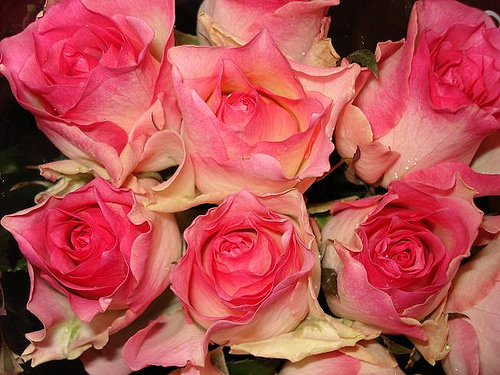

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
# Prepare the dataset
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    label_mode='categorical',
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    label_mode='categorical',
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
# Build the model
resnet_model = Sequential()

# Load the ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet',
    name="resnet50"
)

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
# Add Dense layers on top
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 243ms/step - accuracy: 0.6724 - loss: 1.1412 - val_accuracy: 0.8474 - val_loss: 0.4039
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9058 - loss: 0.2633 - val_accuracy: 0.8433 - val_loss: 0.4657
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9389 - loss: 0.1719 - val_accuracy: 0.8597 - val_loss: 0.3647
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9682 - loss: 0.0949 - val_accuracy: 0.8706 - val_loss: 0.3801
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.8801 - val_loss: 0.3767
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9935 - loss: 0.0321 - val_accuracy: 0.8828 - val_loss: 0.3906
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9967 - loss: 0.0185 - val_accuracy: 0.8924 - val_loss: 0.4024
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.8

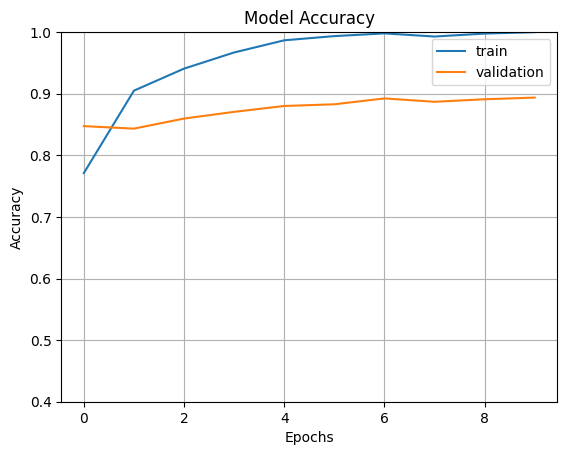

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

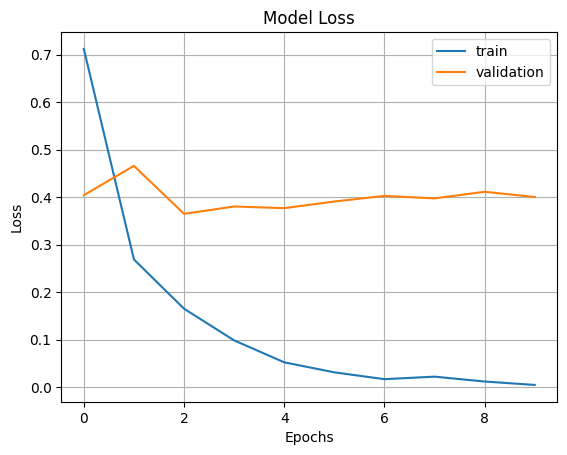

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

In [ ]:
import cv2
image=cv2.imread(str(roses[45]))
image_resized=cv2.resize(image,(180,180))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.6173810e-05 8.3657242e-06 9.9631470e-01 8.9667367e-08 3.6606013e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print(output_class)

roses


#trying on an external images

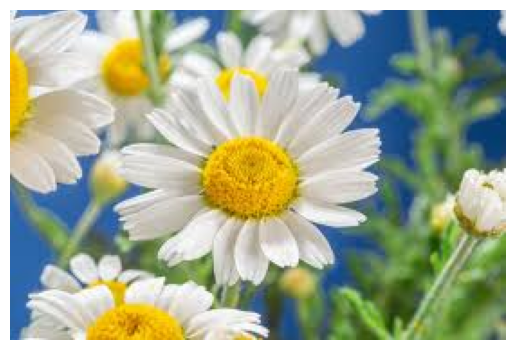

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('download.jpg')

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the new image
image = cv2.imread('download.jpg')

# Resize the image to match the input shape expected by the model (180x180 in this case)
image_resized = cv2.resize(image, (180, 180))

# Expand the dimensions to match the expected input shape for the model (1, 180, 180, 3)
image = np.expand_dims(image_resized, axis=0)

# Check the shape of the image to confirm it's correct
print(image.shape)  # Should output: (1, 180, 180, 3)

# Make the prediction
pred = resnet_model.predict(image)

# Print the raw prediction scores
print(pred)

# Determine the output class
output_class = class_names[np.argmax(pred)]
print(output_class)


(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.9990153e-01 7.6353135e-06 1.0043655e-06 6.8979534e-05 2.0849624e-05]]
daisy


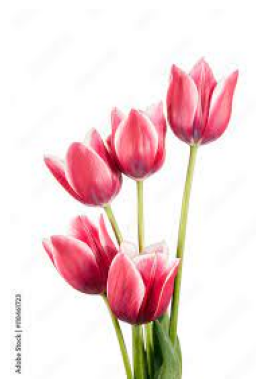

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('images.jpg')

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import cv2
import numpy as np

# Load the new image
image = cv2.imread('images.jpg')

# Resize the image to match the input shape expected by the model (180x180 in this case)
image_resized = cv2.resize(image, (180, 180))

# Expand the dimensions to match the expected input shape for the model (1, 180, 180, 3)
image = np.expand_dims(image_resized, axis=0)

# Check the shape of the image to confirm it's correct
print(image.shape)  # Should output: (1, 180, 180, 3)

# Make the prediction
pred = resnet_model.predict(image)

# Print the raw prediction scores
print(pred)

# Determine the output class
output_class = class_names[np.argmax(pred)]
print(output_class)

(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.0757709e-03 3.2524644e-05 8.5199093e-03 1.1892709e-04 9.8925287e-01]]
tulips


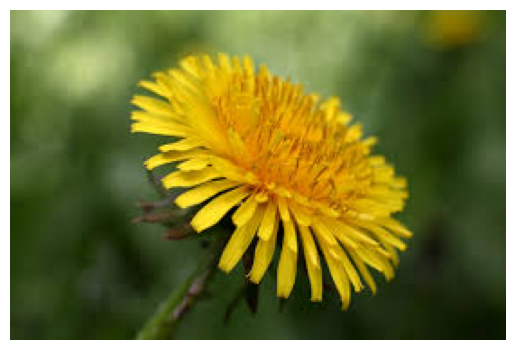

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/dandelion.jpg')

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import cv2
import numpy as np

# Load the new image
image = cv2.imread('/dandelion.jpg')

# Resize the image to match the input shape expected by the model (180x180 in this case)
image_resized = cv2.resize(image, (180, 180))

# Expand the dimensions to match the expected input shape for the model (1, 180, 180, 3)
image = np.expand_dims(image_resized, axis=0)

# Check the shape of the image to confirm it's correct
print(image.shape)  # Should output: (1, 180, 180, 3)

# Make the prediction
pred = resnet_model.predict(image)

# Print the raw prediction scores
print(pred)

# Determine the output class
output_class = class_names[np.argmax(pred)]
print(output_class)

(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.8092077e-03 9.9818856e-01 1.3441992e-07 5.4227985e-07 1.5086633e-06]]
dandelion


In [ ]:
# Save the entire model
resnet_model.save('resnet50_model.h5')

#in case for future use


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('resnet50_model.h5')

# Use the loaded model to make predictions or continue training
loaded_model.summary()